# Lab 3 exercise 1

## 1) Find the outlier value (just by looking at the figure).

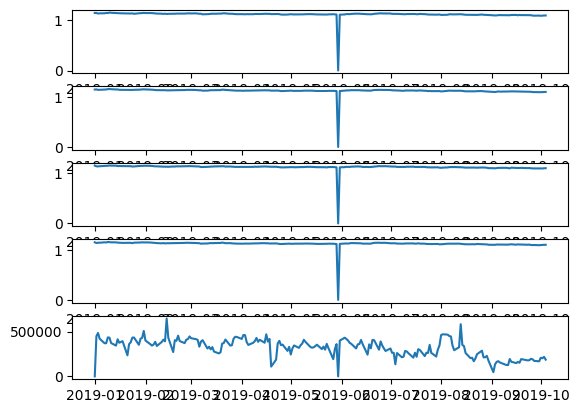

In [1]:
from unicodedata import decimal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import *

# Load the data
data = pd.read_csv("EURUSD_Daily_Ask_2018.12.31_2019.10.05v2.csv", sep=";", decimal=",")
data["Current Date"]= pd.to_datetime(datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
#data.to_csv("Changed.csv", decimal=",", sep=";", index=True)

# Print the data
Ydates=data["Time(UTC)"].astype(np.datetime64)

plt.subplot(511)
plt.plot(Ydates,data["Open"])

plt.subplot(512)
plt.plot(Ydates,data["High"])
plt.subplot(513)
plt.plot(Ydates,data["Low"])
plt.subplot(514)
plt.plot(Ydates,data["Close"])
plt.subplot(515)
plt.plot(Ydates,data["Volume"])
plt.show()

## 2) Detect the samples that are k*σ far from the average.

In [2]:
k = 1.5
std = data["Close"].std()
mean = data["Close"].mean()

print("Mean: ", mean)
print("std =" , std)
print("k*std=" , k*std)

for i, value in data["Close"].items():

    if (value>k*std+mean) or (value<mean-k*std):
        print("Outlier in row:",i+2, "with value of:", value)
        outliner_index=i

print(data["Close"][outliner_index])    


Mean:  1.1174608542713567
std = 0.0807002805545914
k*std= 0.1210504208318871
Outlier in row: 109 with value of: 0.0
0.0


## 3) Remove the line in the pandas dataset.

In [3]:

#data.drop(outliner_index)
data.to_csv("Changed.csv", decimal=",", sep=";", index=True)
#print(data.loc[outliner_index])



## 4) Change the value with the previous one.

In [4]:
#data.replace(data.iloc[outliner_index], data.iloc[outliner_index-1] , inplace=True)

#data.to_csv("Copy_previous.csv", decimal=",", sep=";", index=True)

## 5) Change the value with the interpolation of the previous and the next one.

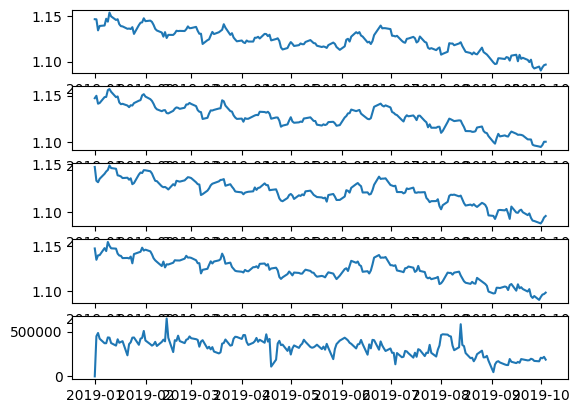

In [5]:
#pandas can interpolate NaN values, therefore we can just replace the outlier with NaN and interpolate it

#separate collumns with dates and values (idk why but pandas.interpolate() doesn't work with dates)

dates_df = data.copy() #copy the data to separate dates and values
dates_df.drop(["Open"], axis=1, inplace=True)
dates_df.drop(["High"], axis=1, inplace=True)
dates_df.drop(["Low"], axis=1, inplace=True)
dates_df.drop(["Close"], axis=1, inplace=True)
dates_df.drop(["Volume"], axis=1, inplace=True)


values_df=data.copy() #copy the data to separate dates and values
values_df.drop(["Time(UTC)"], axis=1, inplace=True)
values_df.drop(["Current Date"], axis=1, inplace=True)

#replace the outlier with NaN 
values_df.replace(data.iloc[outliner_index], np.nan, inplace=True)
#interpolate the NaN values
values_df.interpolate(method="linear", inplace=True)

data= dates_df.join(values_df)

#rearrange the collumns
data.insert(len(data.columns)-1,"Current Date", data.pop("Current Date"))

#save the data
data.to_csv("Interpolated.csv", decimal=",", sep=";", index=True)

#plot the data
plt.subplot(511)
plt.plot(Ydates,data["Open"])

plt.subplot(512)
plt.plot(Ydates,data["High"])
plt.subplot(513)
plt.plot(Ydates,data["Low"])
plt.subplot(514)
plt.plot(Ydates,data["Close"])
plt.subplot(515)
plt.plot(Ydates,data["Volume"])
plt.show()